In [1]:
import numpy as np
import tensorflow as tf
import math
import cv2
import matplotlib.pyplot as plt


In [2]:
arr=np.array([[[0,0,0],[0,0,0]],[[0,0,0],[0,0,0]]])
arr=arr.flatten()
arr[3:6]=1

print(len(arr))

12


In [3]:
def label_oneshot(label):
    new_label=[]
    for i in range(len(label)):
        arr=np.zeros((label[i][:,:,0].shape[0]*label[i][:,:,0].shape[1],38),np.uint64)
        flat_label=label[i][:,:,0].flatten()
        for x in range(len(flat_label)):
            arr[x,flat_label[x]]=1
        arr=np.reshape(arr,(label[i][:,:,0].shape[0],label[i][:,:,0].shape[1],38))
        new_label.append(arr)
    return new_label
def img_resize(img):
    for i in range(len(img)):
        img[i]=cv2.resize(img[i], None, fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
    return img

In [4]:
def l_oneshot(label):
    arr=np.zeros((label[:,:,0].shape[0]*label[:,:,0].shape[1],38),np.uint64)
    flat_label=label[:,:,0].flatten()
    for x in range(len(flat_label)):
        arr[x,flat_label[x]]=1
    arr=np.reshape(arr,(label[:,:,0].shape[0],label[:,:,0].shape[1],38))
    return arr
def im_resize(img):
    img=cv2.resize(img, None, fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
    return img

In [5]:
train_label=[l_oneshot(im_resize(cv2.imread('data/train_labels/img13labels-'+str(i+1).zfill(6)+'.png'))) for i in range(500)]#5285

In [6]:
train_image=[im_resize(cv2.imread('data/train_images/img-'+str(i+1).zfill(6)+'.jpg')) for i in range(500)]#5285

In [ ]:
test_image=[im_resize(cv2.imread('data/test_images/img-'+str(i+1).zfill(6)+'.jpg')) for i in range(500)]#5050

In [ ]:
test_label=[l_oneshot(im_resize(cv2.imread('data/test_labels/img13labels-'+str(i+1).zfill(6)+'.png'))) for i in range(500)]#5050

In [7]:
print(train_label[0].shape)
print(len(train_label[0][:,:,0].flatten()))

(212, 292, 38)
61904


In [9]:
print(len(train_label))

500


In [10]:
h=int(train_image[0].shape[0])
w=int(train_image[0].shape[1])
print(len(train_image))

500


In [11]:
print(train_image[0].shape)

(212, 292, 3)


In [42]:
#learning_rate=0.0001
training_epochs=500
batch_size = 12
tf.reset_default_graph()
x=tf.placeholder(tf.float32,[None,h,w,3])
y=tf.placeholder(tf.float32, [None,h,w,38])

In [43]:
print(x)

Tensor("Placeholder:0", shape=(?, 212, 292, 3), dtype=float32)


In [44]:
w1_1_1=tf.get_variable("w1_1_1", shape=[3,3,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w1_1_2=tf.get_variable("w1_1_2", shape=[6,6,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w1_2_1=tf.get_variable("w1_2_1", shape=[3,3,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w1_2_2=tf.get_variable("w1_2_2", shape=[6,6,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w2_1_1=tf.get_variable("w2_1_1", shape=[3,3,64,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_1_2=tf.get_variable("w2_1_2", shape=[6,6,64,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_2_1=tf.get_variable("w2_2_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_2_2=tf.get_variable("w2_2_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w3_1=tf.get_variable("w3_1", shape=[3,3,128,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_2=tf.get_variable("w3_2", shape=[3,3,128,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_3=tf.get_variable("w3_3", shape=[3,3,256,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_4=tf.get_variable("w3_4", shape=[3,3,256,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_5=tf.get_variable("w3_5", shape=[3,3,128,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())


w4_1_1=tf.get_variable("w4_1_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_1_2=tf.get_variable("w4_1_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_2_1=tf.get_variable("w4_2_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_2_2=tf.get_variable("w4_2_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w5_1_1=tf.get_variable("w5_1_1", shape=[3,3,128,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w5_1_2=tf.get_variable("w5_1_2", shape=[6,6,128,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w5_2_1=tf.get_variable("w5_2_1", shape=[3,3,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w5_2_2=tf.get_variable("w5_2_2", shape=[6,6,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())

In [45]:
b1_1_1=tf.Variable(tf.random_normal([32]))
b1_1_2=tf.Variable(tf.random_normal([32]))
b1_2_1=tf.Variable(tf.random_normal([32]))
b1_2_2=tf.Variable(tf.random_normal([32]))

b2_1_1=tf.Variable(tf.random_normal([64]))
b2_1_2=tf.Variable(tf.random_normal([64]))
b2_2_1=tf.Variable(tf.random_normal([64]))
b2_2_2=tf.Variable(tf.random_normal([64]))

b3_1=tf.Variable(tf.random_normal([128]))
b3_2=tf.Variable(tf.random_normal([256]))
b3_3=tf.Variable(tf.random_normal([256]))
b3_4=tf.Variable(tf.random_normal([128]))


b4_1_1=tf.Variable(tf.random_normal([64]))
b4_1_2=tf.Variable(tf.random_normal([64]))
b4_2_1=tf.Variable(tf.random_normal([64]))
b4_2_2=tf.Variable(tf.random_normal([64]))

b5_1_1=tf.Variable(tf.random_normal([32]))
b5_1_2=tf.Variable(tf.random_normal([32]))
b5_2_1=tf.Variable(tf.random_normal([32]))
b5_2_2=tf.Variable(tf.random_normal([32]))

In [46]:
#############1 conv layer
l1_1_1=tf.nn.relu(tf.nn.conv2d(x,w1_1_1, strides=[1,1,1,1], padding= 'SAME')+b1_1_1)#(?,265,365,32)
l1_1_2=tf.nn.relu(tf.nn.conv2d(x,w1_1_2, strides=[1,1,1,1], padding= 'SAME')+b1_1_2)#(?,265,365,32)
l1_conv_1=tf.concat([l1_1_1, l1_1_2],3)#(?,265,365,64)
l1_2_1=tf.nn.relu(tf.nn.conv2d(l1_conv_1,w1_2_1, strides=[1,1,1,1], padding= 'SAME')+b1_2_1)#(?,265,365,32)
l1_2_2=tf.nn.relu(tf.nn.conv2d(l1_conv_1,w1_2_2, strides=[1,1,1,1], padding= 'SAME')+b1_2_2)#(?,265,365,32)
l1_conv_2=tf.concat([l1_2_1,l1_2_2],3)#(?,265,365,64)
l1=tf.nn.avg_pool(l1_conv_2, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')#(?,89, 122,,64)

#############2 conv layer
l2_1_1=tf.nn.relu(tf.nn.conv2d(l1,w2_1_1, strides=[1,1,1,1], padding= 'SAME')+b2_1_1)#(?,89, 122,64)
l2_1_2=tf.nn.relu(tf.nn.conv2d(l1,w2_1_2, strides=[1,1,1,1], padding= 'SAME')+b2_1_2)#(?,89, 122,64)
l2_conv_1=tf.concat([l2_1_1, l2_1_2],3)#(?,88,121,128)
l2_2_1=tf.nn.relu(tf.nn.conv2d(l2_conv_1,w2_2_1, strides=[1,1,1,1], padding= 'SAME')+b2_2_1)#(?,89, 122,64)
l2_2_2=tf.nn.relu(tf.nn.conv2d(l2_conv_1,w2_2_2, strides=[1,1,1,1], padding= 'SAME')+b2_2_2)#(?,89, 122,64)
l2_conv_2=tf.concat([l2_2_1, l2_2_2],3)#(?,88,121,128)
l2=tf.nn.avg_pool(l2_conv_2, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')#(?,30, 41,128)

#############3 conv layer
l3_1=tf.nn.relu(tf.nn.conv2d(l2,w3_1, strides=[1,1,1,1], padding= 'SAME')+b3_1)#(?,30, 41, 128)
l3_2=tf.nn.relu(tf.nn.conv2d(l3_1,w3_2, strides=[1,1,1,1], padding= 'SAME')+b3_2)#(?,30, 41, 256)
l3_3=tf.nn.relu(tf.nn.conv2d(l3_2,w3_3, strides=[1,1,1,1], padding= 'SAME')+b3_3)#(?,30, 41, 256)
l3=tf.nn.avg_pool(l3_3, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')#(?,30, 41,128)

#############4 conv layer
l3_4=tf.nn.relu(tf.nn.conv2d(l3,w3_4, strides=[1,1,1,1], padding= 'SAME')+b3_4)#(?,30, 41, 128)
l3_5=tf.image.resize_images(l3_4,[int(math.ceil(h/9)),int(math.ceil(w/9))])#(?,10, 12, 256)
l3_6=tf.nn.relu(tf.nn.conv2d_transpose(l3_5,w3_5,tf.stack([tf.shape(x)[0],int(math.ceil(h/9)),int(math.ceil(w/9)),128]),strides=[1,1,1,1],padding='SAME'))

#############1 deconv layer
l4_1=tf.image.resize_images(l3_6,[int(math.ceil(h/3)),int(math.ceil(w/3))])#(?,89, 122, 256)
l4_1_1=tf.nn.relu(tf.nn.conv2d(l4_1,w4_1_1, strides=[1,1,1,1], padding= 'SAME')+b4_1_1)#(?,89, 122, 64)
l4_1_2=tf.nn.relu(tf.nn.conv2d(l4_1,w4_1_2, strides=[1,1,1,1], padding= 'SAME')+b4_1_2)#(?,89, 122, 64)
l4_conv_1=tf.concat([l4_1_1, l4_1_2],3)#(?,89, 122, 128)
l4_2_1=tf.nn.relu(tf.nn.conv2d(l4_conv_1,w4_2_1, strides=[1,1,1,1], padding= 'SAME')+b4_2_1)#(?,89, 122, 64)
l4_2_2=tf.nn.relu(tf.nn.conv2d(l4_conv_1,w4_2_2, strides=[1,1,1,1], padding= 'SAME')+b4_2_2)#(?,89, 122, 64)
l4=tf.concat([l4_2_1, l4_2_2],3)#(?,89, 122, 128)

#############2 deconv layer
l5_1=tf.image.resize_images(l4,[h,w])#(?,265,365, 128)
l5_1_1=tf.nn.relu(tf.nn.conv2d(l5_1,w5_1_1, strides=[1,1,1,1], padding= 'SAME')+b5_1_1)#(?,265,365, 32)
l5_1_2=tf.nn.relu(tf.nn.conv2d(l5_1,w5_1_2, strides=[1,1,1,1], padding= 'SAME')+b5_1_2)#(?,265,365, 32)
l5_conv_1=tf.concat([l5_1_1, l5_1_2],3)#(?,265,365, 64)
l5_2_1=tf.nn.relu(tf.nn.conv2d(l5_conv_1,w5_2_1, strides=[1,1,1,1], padding= 'SAME')+b5_2_1)#(?,265,365, 32)
l5_2_2=tf.nn.relu(tf.nn.conv2d(l5_conv_1,w5_2_2, strides=[1,1,1,1], padding= 'SAME')+b5_2_2)#(?,265,365, 32)
l5=tf.concat([l5_2_1, l5_2_2],3)#(?,265,365, 64)

In [47]:
print(l1)
print(l2)
print(l3)
print(l4)
print(l5)
print(l4_1)
print(l3_3)
print(int(math.ceil(h/9)),int(math.ceil(w/9)))

Tensor("AvgPool:0", shape=(?, 71, 98, 64), dtype=float32)
Tensor("AvgPool_1:0", shape=(?, 24, 33, 128), dtype=float32)
Tensor("AvgPool_2:0", shape=(?, 8, 11, 256), dtype=float32)
Tensor("concat_5:0", shape=(?, 71, 98, 128), dtype=float32)
Tensor("concat_7:0", shape=(?, 212, 292, 64), dtype=float32)
Tensor("ResizeBilinear_1:0", shape=(?, 71, 98, ?), dtype=float32)
Tensor("Relu_10:0", shape=(?, 24, 33, 256), dtype=float32)
24 33


In [48]:
w6_1_1=tf.get_variable("w6_1_1", shape=[3,3,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_1_2=tf.get_variable("w6_1_2", shape=[6,6,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_2_1=tf.get_variable("w6_2_1", shape=[3,3,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_2_2=tf.get_variable("w6_2_2", shape=[6,6,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())


b6_1_1=tf.Variable(tf.random_normal([32]))
b6_1_2=tf.Variable(tf.random_normal([32]))
b6_2_1=tf.Variable(tf.random_normal([32]))
b6_2_2=tf.Variable(tf.random_normal([32]))



w7_1_1=tf.get_variable("w7_1_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w7_1_2=tf.get_variable("w7_1_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())

b7_1_1=tf.Variable(tf.random_normal([64]))
b7_1_2=tf.Variable(tf.random_normal([64]))


w8=tf.get_variable("w8", shape=[1,1,128,38], initializer=tf.contrib.layers.xavier_initializer_conv2d())
b8=tf.Variable(tf.random_normal([38]))



In [49]:
l6_1_1=tf.nn.relu(tf.nn.conv2d(x,w6_1_1, strides=[1,1,1,1], padding= 'SAME')+b6_1_1)#(?,265,365,32)
l6_1_2=tf.nn.relu(tf.nn.conv2d(x,w6_1_2, strides=[1,1,1,1], padding= 'SAME')+b6_1_2)#(?,265,365,32)
l6_conv_1=tf.concat([l6_1_1, l6_1_2],3)#(?,265,365,64)
l6_2_1=tf.nn.relu(tf.nn.conv2d(l6_conv_1,w6_2_1, strides=[1,1,1,1], padding= 'SAME')+b6_2_1)#(?,265,365,32)
l6_2_2=tf.nn.relu(tf.nn.conv2d(l6_conv_1,w6_2_2, strides=[1,1,1,1], padding= 'SAME')+b6_2_2)#(?,265,365,32)
l6=tf.concat([l6_2_1, l6_2_2],3)#(?,265,365,64)

l7=tf.concat([l5, l6],3)#(?,265,365, 128)

l7_1_1=tf.nn.relu(tf.nn.conv2d(l7,w7_1_1, strides=[1,1,1,1], padding= 'SAME')+b7_1_1)#(?,265,365, 32)
l7_1_2=tf.nn.relu(tf.nn.conv2d(l7,w7_1_2, strides=[1,1,1,1], padding= 'SAME')+b7_1_2)#(?,265,365, 32)
l8=tf.concat([l7_1_1, l7_1_2],3)#(?,265,365, 64)

output=tf.nn.conv2d(l8,w8, strides=[1,1,1,1], padding= 'SAME')+b8#(?,265,365,37)

In [50]:
print(l6)

Tensor("concat_9:0", shape=(?, 212, 292, 64), dtype=float32)


In [51]:
flat_output=tf.reshape(output,[-1,38])
soft=tf.nn.softmax(flat_output)
flat_y=tf.reshape(y,[-1,38])


# entropy=-tf.log(soft)*flat_y
# t_cost=tf.reshape(entropy,[-1,h*w*38])
# a_loss=tf.reduce_mean(t_cost,1)
# cost=tf.reduce_mean(t_cost)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=flat_output,labels=flat_y))



In [53]:
learning_rate=tf.train.exponential_decay(0.001,batch_size,training_epochs,0.9)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
image=tf.argmax(output,3)
y_image=tf.argmax(y,3)


Learning start
epoch :  0
loss :  2.99133


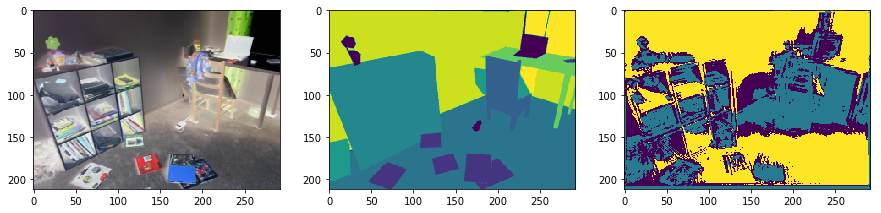

epoch :  1
loss :  2.82894


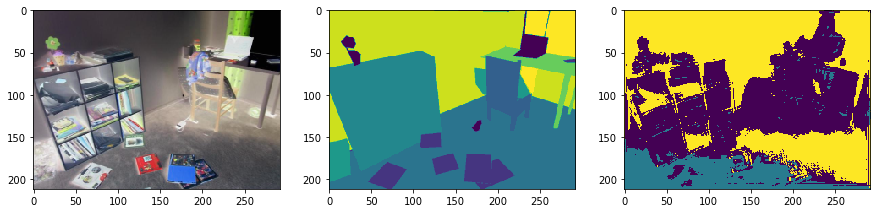

epoch :  2
loss :  2.47853


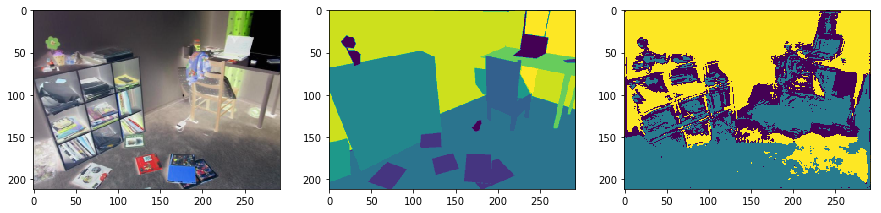

epoch :  3
loss :  2.45501


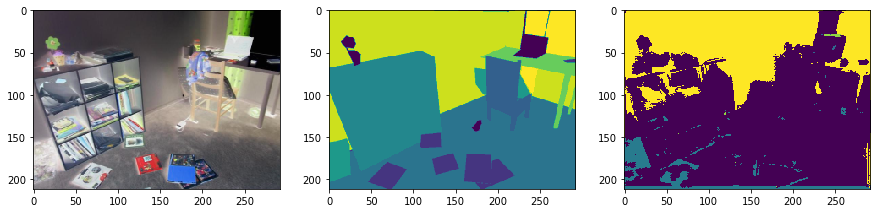

epoch :  4


In [ ]:
print("Learning start")
sess=tf.Session()
sess.run(tf.global_variables_initializer())


for epoch in range(training_epochs):
    a=0
    total_batch = int(math.ceil(len(train_image)/batch_size))
    print("epoch : ",epoch)
    for i in range(total_batch):
        if a+batch_size>len(train_image):
            batch_xs=train_image[a:]
            batch_ys=train_label[a:]
        else:
            batch_xs=train_image[a:a+batch_size]
            batch_ys=train_label[a:a+batch_size]
        feed_dict={x:batch_xs, y:batch_ys}
        x_img,y_img,img,l,_=sess.run([x,y_image,image,cost,optimizer], feed_dict=feed_dict)
        if l==tf.is_nan:
            break
        for i in range(len(batch_xs)):
            cv2.imwrite('output2/output_img-'+str(a+i+1).zfill(6)+'.jpg',img[i,:,:])

        a=a+batch_size
    
    print("loss : ", l)
    plt.figure(figsize=(15,15))
    y_im=np.minimum(y_img[0,:,:]*5,255)
    im1=np.minimum(img[0,:,:]*5,255)
    plt.subplot(1,3,1); plt.imshow(x_img[0])
    plt.subplot(1,3,2); plt.imshow(y_im)       
    plt.subplot(1,3,3); plt.imshow(im1)
    plt.show()

In [ ]:
test_img=sess.run([image],feed_dict={x:test_image, y:new_test_label})


In [ ]:
label_image=[im_resize(cv2.imread('data/train_labels/img13labels-'+str(i+1).zfill(6)+'.png')) for i in range(500)]#5285
output_image=[cv2.imread('output2/output_img-'+str(i+1).zfill(6)+'.jpg') for i in range(500)]#5285
for i in range(500):
    if i %50:
        plt.figure(figsize=(15,15))
        y_im=np.minimum(label_image[i][:,:,0]*5,255)
        im1=np.minimum(output_image[i][:,:,0]*5,255)
        plt.subplot(1,2,1); plt.imshow(y_im)       
        plt.subplot(1,2,2); plt.imshow(im1)
        plt.show()

In [1]:
cor_pre=tf.equal(tf.arg_max(output,1),tf.arg_max(y,1))
acc_=tf.reduce_mean(tf.cast(cor_pre,tf.float32))
feed_dict={x1:test_image, y:test_label, keep_conv:0.8, keep_hidden:0.5}
test_acc=sess.run(acc_,feed_dict=feed_dict)
print("accuracy : ", test_acc)

NameError: name 'tf' is not defined